In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os

In [7]:
sampling_rate, data = wavfile.read('c_major_ceg.wav')

In [8]:
# Convert the audio data to mono if it's in stereo
if data.ndim > 1:
    data = data[:, 0]

In [9]:
# Perform Fourier Transform
frequencies = np.fft.fft(data)

In [10]:
# Calculate the corresponding frequencies
n = len(data)
timestep = 1.0 / sampling_rate
freq = np.fft.fftfreq(n, d=timestep)

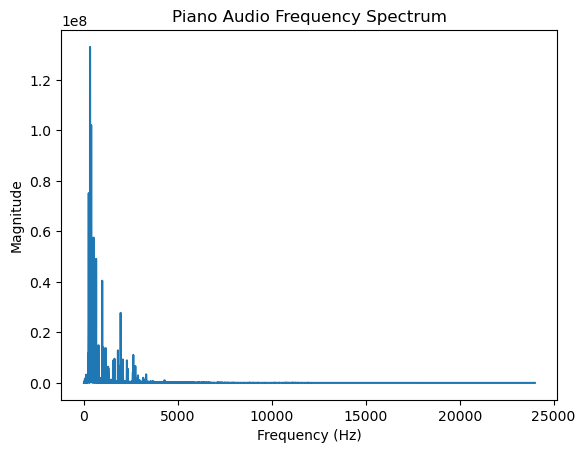

In [11]:
# Plot the frequency spectrum
plt.plot(freq[:n // 2], np.abs(frequencies[:n // 2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Piano Audio Frequency Spectrum')
plt.show()

In [13]:
# Function to calculate note frequencies based on A4 (440 Hz)
def calculate_note_frequencies():
    note_names = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']
    note_frequencies = {}
    a4_frequency = 440  # Frequency of A4 note
    for i, note in enumerate(note_names):
        note_frequency = a4_frequency * (2 ** (i / 12))
        note_frequencies[note] = note_frequency
    return note_frequencies

In [14]:
# Calculate note frequencies
note_frequencies = calculate_note_frequencies()

In [15]:
# Identify the significant peaks
threshold = 10000  # Adjust the threshold as needed
significant_peaks = np.where(np.abs(frequencies) > threshold)[0]

In [16]:
# Match frequencies to notes
notes = []
for peak in significant_peaks:
    frequency = freq[peak]
    note = min(note_frequencies, key=lambda x: abs(note_frequencies[x] - frequency))
    notes.append(note)